# Project 4 : Mall Customers Segmentation

This project aims to categorize customers based on their income and spending behavior, analyze how variables such as gender, age, and income impact spending scores, and leverage these insights to design tailored promotions for distinct customer segments.

We will explore our dataset, complete pre-processing steps, and create K-Means and Agglomerative Clustering models.

Clustering algorithms are unsupervised machine-learning techniques that form clusters of similar data points based on their characteristics. These algorithms identify patterns in the data, finding groupings without prior knowledge of labels or categories.

Key Features:

Unsupervised Learning: Does not require predefined categories or labeled data.
Similarity Measure: Clustering is based on a measure of similarity or distance, such as Euclidean distance or cosine similarity.
Output: The result is a set of clusters where data points in the same cluster are more similar to each other than to those in otdifferentlusters.

Common Clustering Algorithms:

K-Means Clustering: Partitions data into  K clusters by minimizing cluster variance.

Hierarchical Clustering: Creates a hierarchy of clusters using a bottom-up (agglomerative) or top-down (divisive) approach.

DBSCAN (Density-Based Spatial Clustering): Groups points based on density and identifies outliers as noise.
Works well with irregularly shaped clusters.

Agglomerative Clustering: A type of hierarchical clustering that successively merges closest clusters based on a linkage criterio

Sources used:
Best Artificial Intelligence Topics for Project. https://mmcalumni.ca/blog/artificial-intelligence-topics-for-project
Understanding the Essentials of Machine Learning Algorithms - machinelearningconsulting. https://machinelearningconsulting.net/understanding-the-essentials-of-machine-learning-algorithms/

## Data

In [17]:
# https://www.kaggle.com/datasets/abdallahwagih/mall-customers-segmentation/data

##### Data Overview :

The Mall customer datasaet contains data on 200 customers who visit a mall. This dataset contains demographic information, annual income,m and spending habits.

##### Dataset Summary
Number of records : 200
Number of columns : 5

##### Dataset features
CustomerID :  A unique identifer for each customer (integer data tyoe)
Genre :  Gender of the customer (Male / Female  : Object type)
Age : The age of the customer (Interver data type)
Annual Income (k$) : Annual income of the customer in thousands of dollars (Integer data type)
Spending Score (1-100) :  score assigned by the mall based on customer customer spending patterns (Integer data type)




## Load Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder


## Read Data

In [14]:
##Remember to change the path name to where you have place the csv!
df = pd.read_csv('Mall_Customers.csv')

In [15]:
df.head()

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [17]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [18]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

## Initial Data Understanding and Preprocessing 

What relationships exist between features?

#### Drop the CustomerID column as it's not relevant for clustering or analysis.

In [24]:
df.drop('CustomerID', axis=1, inplace=True)

#### Encode the Genre column into numerical values (e.g., Male = 0, Female = 1).

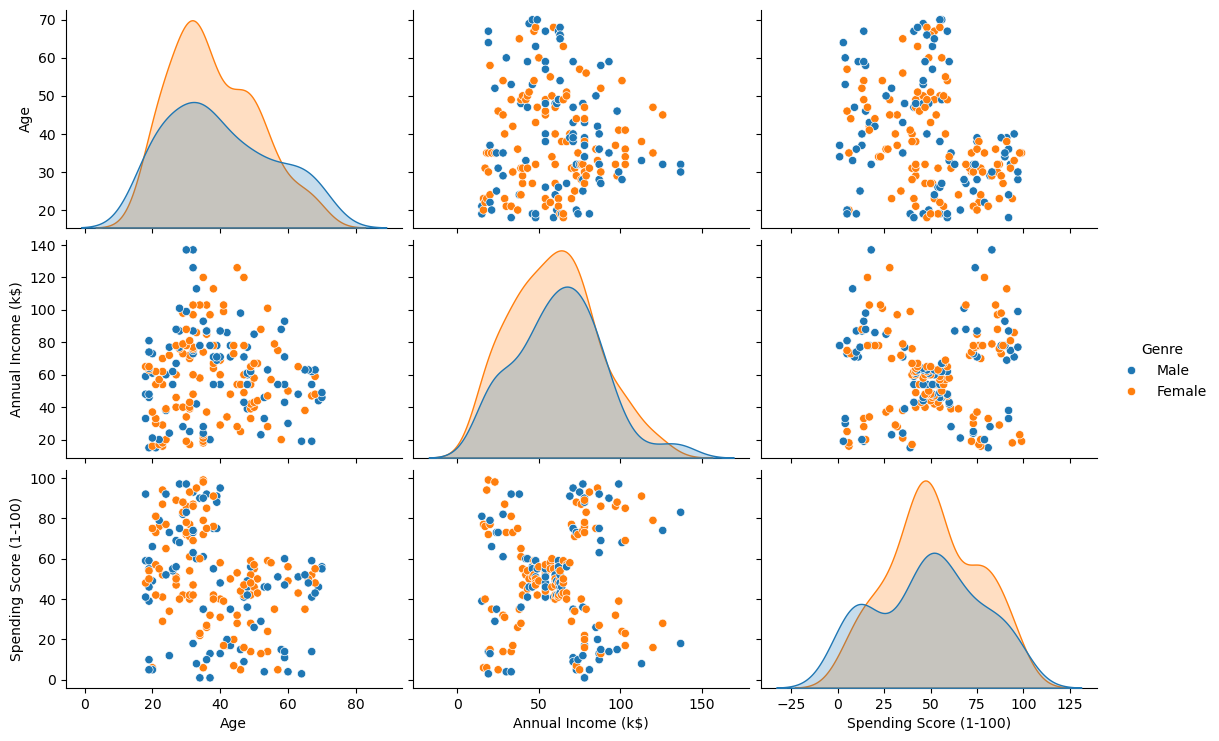

In [35]:
sns.pairplot(df, hue='Genre', aspect=1.5)

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

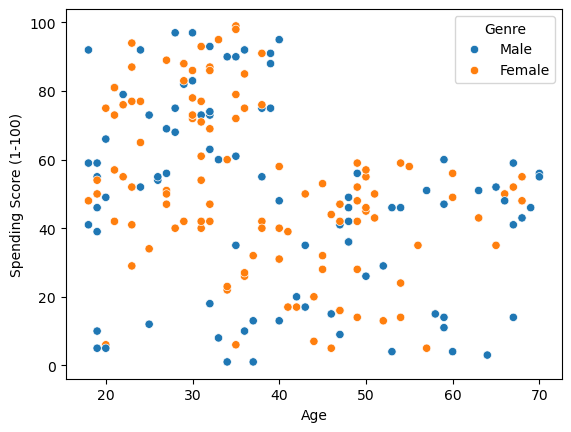

In [36]:
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Genre', data=df)

#### Observation : Younger customers have higher spending scores while older customers show lower scores

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

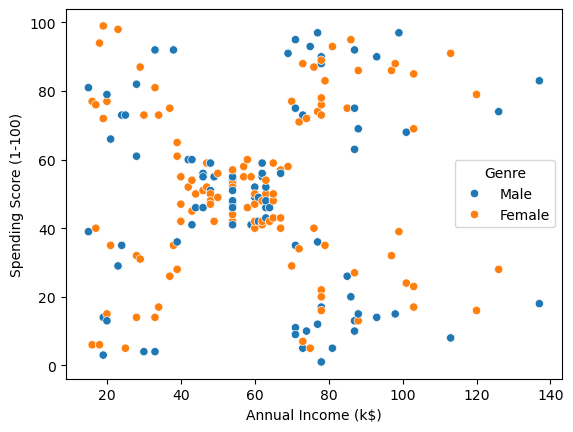

In [38]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre', data=df)

#### Observation : Customers with high and lower income have varied spending scores where as customers with mid-range income have average spending score.

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

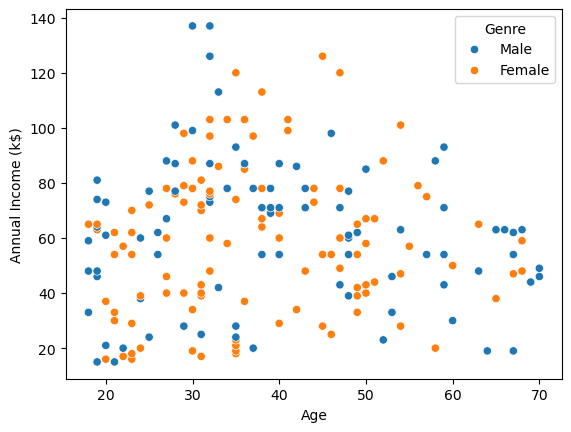

In [40]:
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Genre', data=df)

#### Observation :  This shows that income increases with age and graually decreases as customers get older.

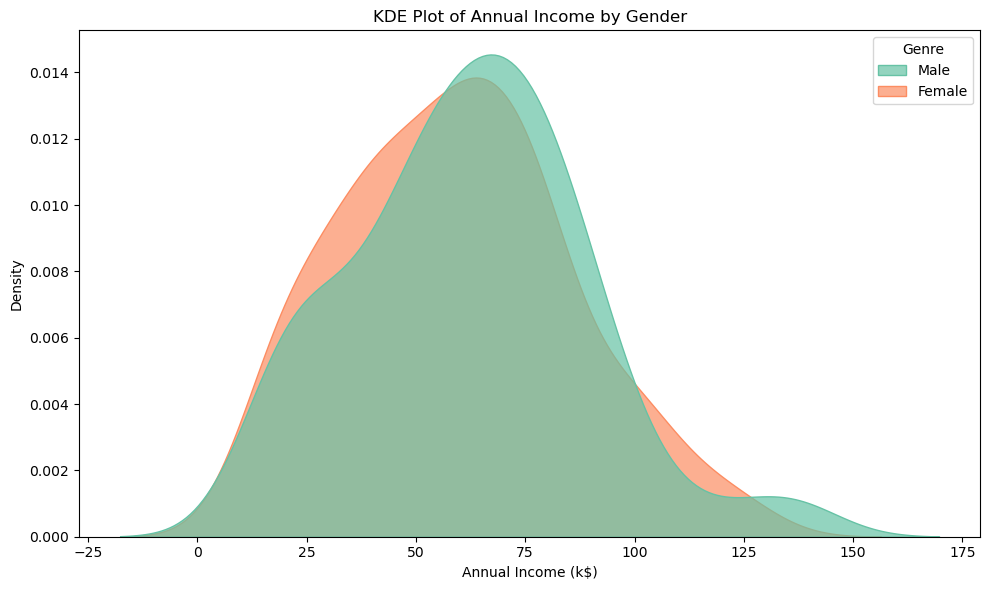

In [42]:
# KDE plot for "Annual Income (k$)" grouped by "Genre"
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Annual Income (k$)', hue='Genre', fill=True, common_norm=False, alpha=0.7, palette='Set2')
plt.title("KDE Plot of Annual Income by Gender")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

#### This plot reveals the distribution of annual incomes for Male and Female customers, highlighting any differences in income patterns between genders.

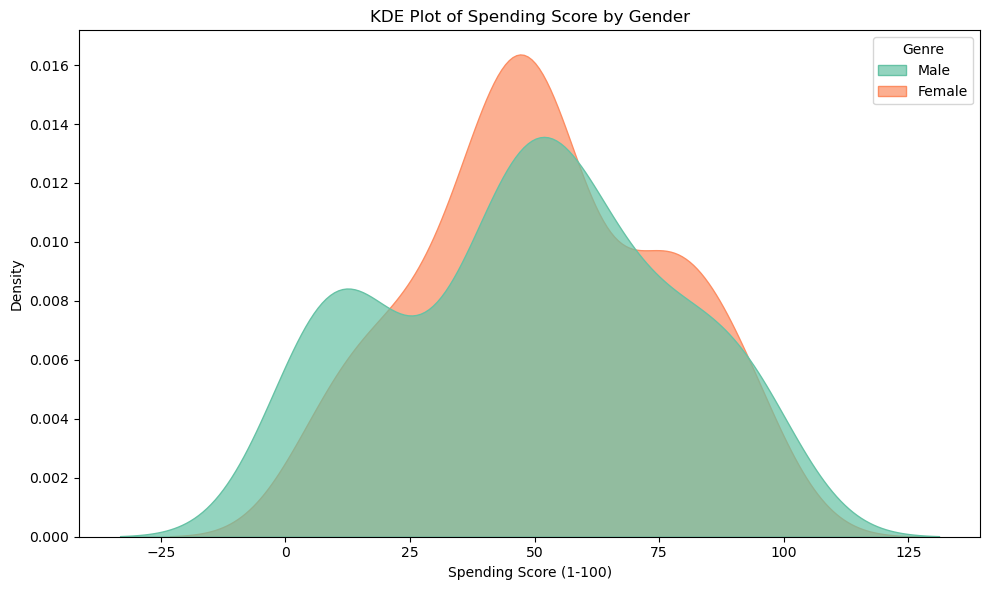

In [46]:
# KDE plot for "Annual Income (k$)" grouped by "Genre"
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Spending Score (1-100)', hue='Genre', fill=True, common_norm=False, alpha=0.7, palette='Set2')
plt.title("KDE Plot of Spending Score by Gender")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

Correlations -- many things correlate with "total," which makes sense since that is just the sum of all the stats. More female and male customers have a spending score around 45. 

<Axes: >

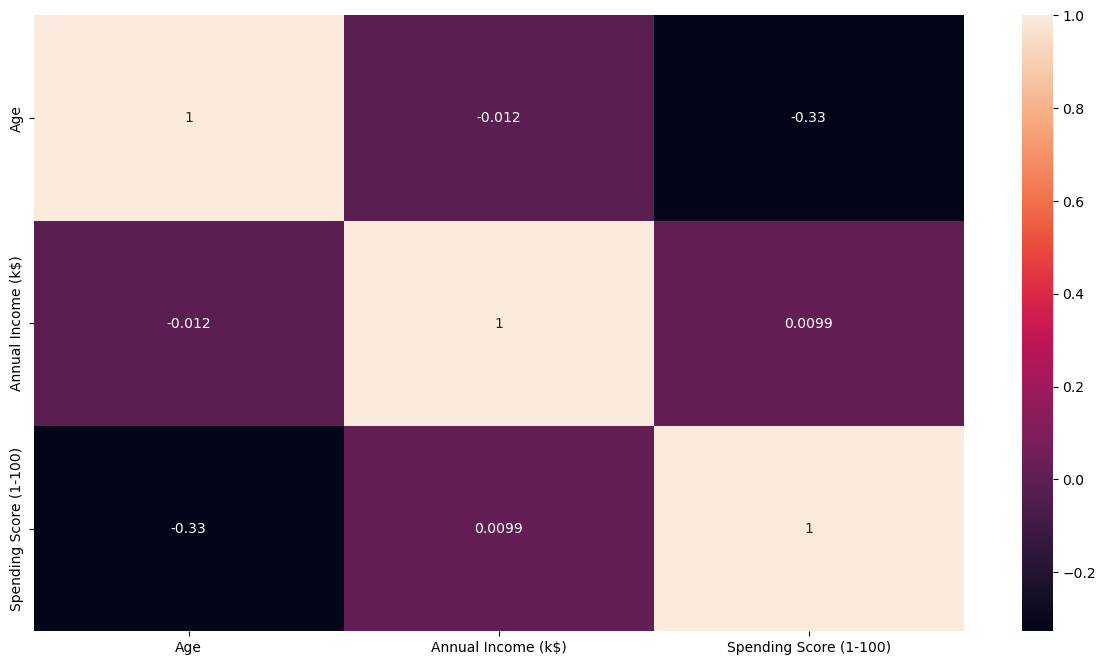

In [48]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(numeric_only= True),annot = True)


#### Observations :  
##### There is a negative correlation existing between age and spending score, it may suggest that younger customers tend to have higher spending scores compared to older ones.
##### Annual income is not strongly dependent on age in this dataset.

<hr>

## K-Means Clustering

In [115]:
# Remember how we determine the best number of clusters (if we can't just manually look at it and decide)?  
  
# We look at the variance -- or, the sum of squared distances between the observations and their centroids.
# Note: "inertia" is the "within-cluster sum-of-squares criterion." See [scikit learn documentation](https://scikit-learn.org/stable/modules/clustering.html).

In [53]:
X = df.drop(['Genre'], axis=1)

In [54]:
inertia = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

Text(0, 0.5, 'Variance')

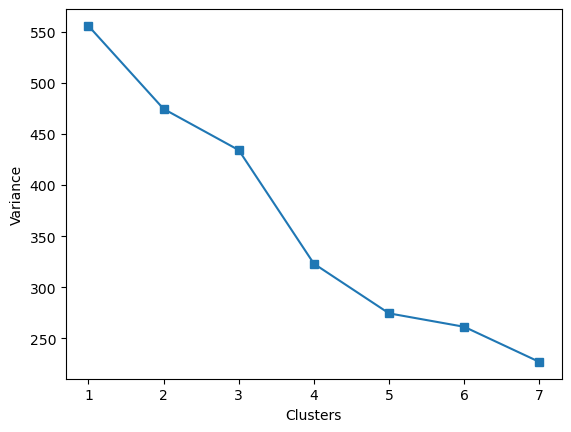

In [57]:
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('Clusters')
plt.ylabel('Variance')

#### Observation :  This method shows to select the cluster when there is a significant change in variance.  As we can see on the grapsh, there are significant variance changes observed either 3 or 5. This require further graphical anlaysis to decide.

#### Number of cluster = 3

In [64]:
#create KMeans model
kmeans = KMeans(n_clusters=3, random_state=1).fit(X)

C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Now that we have fit our k-means clusters, let's just find what value (0 or 1, since we have set K=3) each row of data is so we can visualize it.

In [69]:
y = kmeans.fit_predict(X)

C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


We are reusing the PCA (dimensionality reduction) data frame for the sake of visualizing 2-dimensional data (rather than 5).

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

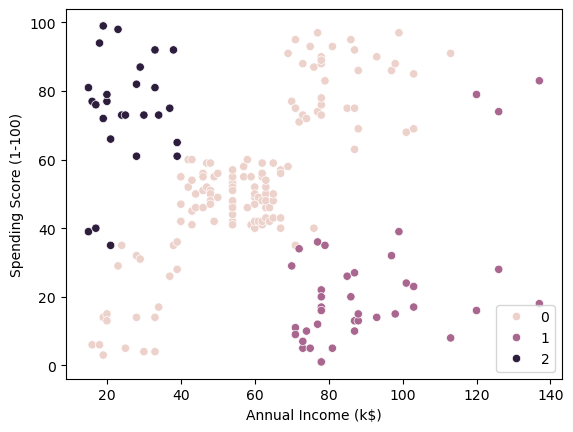

In [71]:
#sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=y)
sns.scatterplot(x = X['Annual Income (k$)'], y = X['Spending Score (1-100)'], hue=y)

#### Number of cluster = 5

In [78]:
#create KMeans model
kmeans = KMeans(n_clusters=5, random_state=1).fit(X)

C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [80]:
y = kmeans.fit_predict(X)

C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

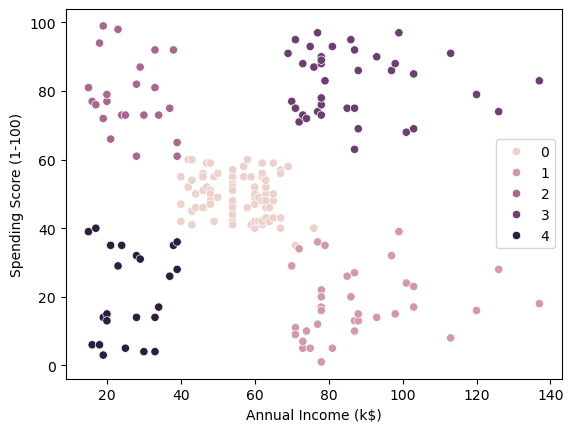

In [82]:
sns.scatterplot(x = X['Annual Income (k$)'], y = X['Spending Score (1-100)'], hue=y)

From the above 2 plots we could say that 5 cluster seems better than the 3 cluster option. 

Below is 5 cluster detail observations:

Label 0 is Mid Annual Income and Mid Spending 
Label 1 is Higg Annual Income and Low Spending
Label 2 is Low Annual income and High spending
Label 3 is High Annual Income and High spending
Label 4 is Low Annual Income and Low Spending

#### Agglomerative Clustering

In [88]:
AgglomerativeClustering?

Init signature:
AgglomerativeClustering(
    n_clusters=2,
    *,
    metric='euclidean',
    memory=None,
    connectivity=None,
    compute_full_tree='auto',
    linkage='ward',
    distance_threshold=None,
    compute_distances=False,
)
Docstring:     
Agglomerative Clustering.

Recursively merges pair of clusters of sample data; uses linkage distance.

Read more in the :ref:`User Guide <hierarchical_clustering>`.

Parameters
----------
n_clusters : int or None, default=2
    The number of clusters to find. It must be ``None`` if
    ``distance_threshold`` is not ``None``.

metric : str or callable, default="euclidean"
    Metric used to compute the linkage. Can be "euclidean", "l1", "l2",
    "manhattan", "cosine", or "precomputed". If linkage is "ward", only
    "euclidean" is accepted. If "precomputed", a distance matrix is needed
    as input for the fit method.

    .. versionadded:: 1.2

    .. deprecated:: 1.4
       `metric=None` is deprecated in 1.4 and will be removed in 1

We have already done some pre-processing, but to keep things together for this practice, lets put them here again! We will be using the same "X" from K-Means with HP, Attack, Defense, Special Attack and Special Defense with Speed as well.

In [91]:
X = df[['Age','Annual Income (k$)','Spending Score (1-100)']]

Let's figure out how many clusters is optimal for this model. Agglomerative Clustering used a dendrogram to determine this number!



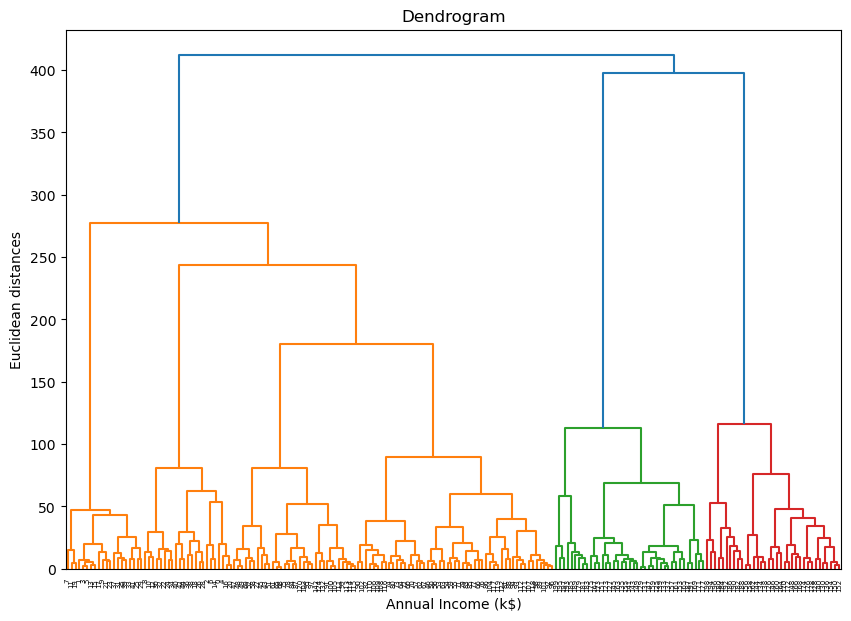

In [94]:
#Create and display a dendrogram
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title('Dendrogram')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Euclidean distances')
plt.axhline(y=825, color='r', linestyle='--')
plt.axhline(y=1575, color='r', linestyle='--')
dend = shc.dendrogram(shc.linkage(X, method='ward'))


To read a dendrogram to find the optimal number of clusters, find the section with the highest width. the number of lines (in this example the blue lines) intersecting the section is the optimal number of clusters.

Can you tell how many clusters is the optimal amount : 5

After determining what the optimal number of clusters is, input it into the model implementation below!

In [98]:
# Put your optimal number of clusters here
optimal_number = 5

# Implement model
agglo = AgglomerativeClustering(n_clusters= optimal_number, metric='euclidean', linkage='ward')

# Alternate implementation if you are using an older version that uses "affinity" and not "metric"
#agglo = AgglomerativeClustering(n_clusters= optimal_number, affinity='euclidean', linkage='ward')


Now lets fit and create some prediction to visualize the clusters!

In [100]:
y_agglo = agglo.fit_predict(X)

Now let's visualize! We will once again be using PCA to do so.

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

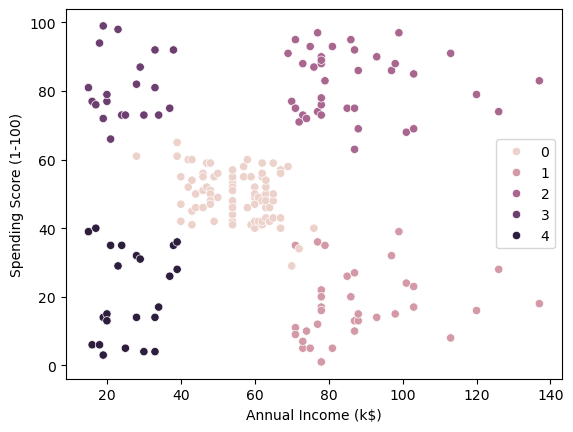

In [102]:
#sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=y_agglo)

sns.scatterplot(x = X['Annual Income (k$)'], y = X['Spending Score (1-100)'], hue=y_agglo)

Now lets look again at K-Means visual again to compare

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

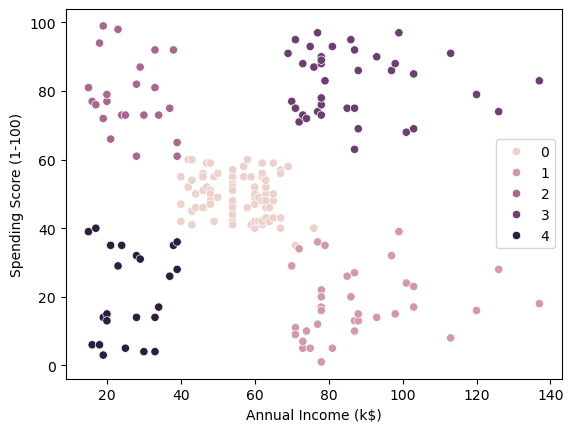

In [104]:

sns.scatterplot(x = X['Annual Income (k$)'], y = X['Spending Score (1-100)'], hue=y)


There are not that many differences between using K-Means and Agglomerative Clustering

#### Storytelling (Clustering Analysis)
#### Finding customer insights through clustering analysis
This project aims to better understand mall customers and their shopping habits by completing a detailed analysis using a dataset of 200 customers. Each record had features such as customerID, Gender, Age, Annual income, and spending score. The main goal is to segment customers into meaningful clusters so they can be used while designing effective marketing strategies. 
#### Key observations: 
##### The correlation between age and spending habits: 
Younger customers tend to have higher spending scores implying they have frequent or higher value purchases. On the other hand, older customers often have lower spending scores showing that they may be more frugal/careful with their purchases.
##### Income and spending: 
Customers with mid range incomes usually have average spending scores while high and low income customers do not have a strong correlation to spending scores and have more varied spending scores
##### Gender differences
Spending patterns converge around a score of 45 for both genders
##### Correlations 
A negative correlation exists between age and spending score. 
Annual income does not have any dependency on age in this dataset.
#### Clustering methodology
To find hidden customer segments K-means and agglomerative clustering were used. For K-means the best fitting number of clusters was determined by analyzing the elbow method. Significant changes in variance pointed to either 3 or 5 clusters. A closer examination showed that 5 clusters was optimal. For agglomerative clustering the width of the sections revealed that the 5 clusters provided the most meaningful separation. There are minimal differences beteween the two. 
#### Possible impacts of this project
It helps improve a customers experience by understanding the customers behavior and preferences so that malls can tailor their services. This could increase customer satisfaction and make them feel valued which as a result drives up their engagement.
Looking at the different demographics can help the mall create more personalized promotions/offers making the experience more enjoyable for a greater number of consumers. They can find better marketing strategies targeting groups that typically spend less- for example older customers. 
Helps in optimizing resource allocation by focusing on high value segments ensuring a better return on investment. 
#### Conclusion
This clustering analysis highlights different customer profiles from younger customers who often spend more to frugal older customers. The insights gained from this project can help the mall come up with more effective marketing strategies, find the best product placements/most effective store layout, and overall enhance the customers shopping experience. Gaining a deeper understanding of their consumers allows for the mall to build customer loyalty and drive up their sales. 